# Intercorrélation

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
from matplotlib.gridspec import GridSpec

import matplotlib as mpl
mpl.rcParams['axes.grid'] = True
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.size'] = 16

## Communications numériques

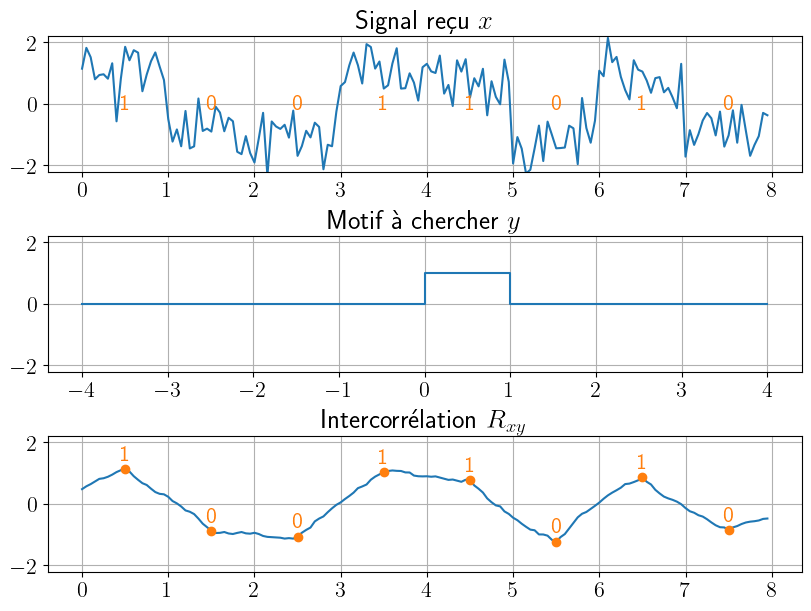

In [3]:
# Initialisation de l'affichage
ylim = [-2.2, 2.2]
fig, axs = plt.subplots(3, 1, figsize=(8,6), layout="constrained")

# Message
msg = np.array([1, 0, 0, 1, 1, 0, 1, 0])
M = len(msg)

# Temps & instants d'échantillonnage
Fe = 20
n = np.arange(0, M, 1/Fe)
idx = np.arange(M)*Fe + Fe//2

# Forme d'onde
h = np.ones(Fe)

# Signal émis
x = np.kron(2*msg-1, h)

# Signal reçu (bruité)
b = np.random.normal(0, .5, x.shape)
y = x + b
axs[0].plot(n,y)
for i in range(M):
    axs[0].text(n[idx[i]], 0, msg[i], ha="center", va="center", color="C1")
axs[0].set_title('Signal reçu $x$')
axs[0].set_ylim(ylim)

# Forme d'onde (graphique)
axs[1].plot([-4, 0, 0, 1, 1, 4], [0, 0, 1, 1, 0, 0])
axs[1].set_title('Motif à chercher $y$')
axs[1].set_ylim(ylim)

# Intercorrélation
z = np.correlate(y, h/Fe, mode="same")
axs[2].plot(n, z)
for i in range(M):
    axs[2].plot(n[idx[i]], z[idx[i]], "C1o")
    axs[2].text(n[idx[i]], z[idx[i]]+.15, msg[i], ha="center", va="bottom", color="C1")
axs[2].set_title('Intercorrélation $R_{xy}$')
axs[2].set_ylim(ylim)

plt.savefig("communications.svg", bbox_inches="tight")

## Intercorrélation avec une sinusoïde

/tmp/ipykernel_80001/1749477368.py:45: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  plt.savefig("sinusoide.svg", bbox_inches='tight')


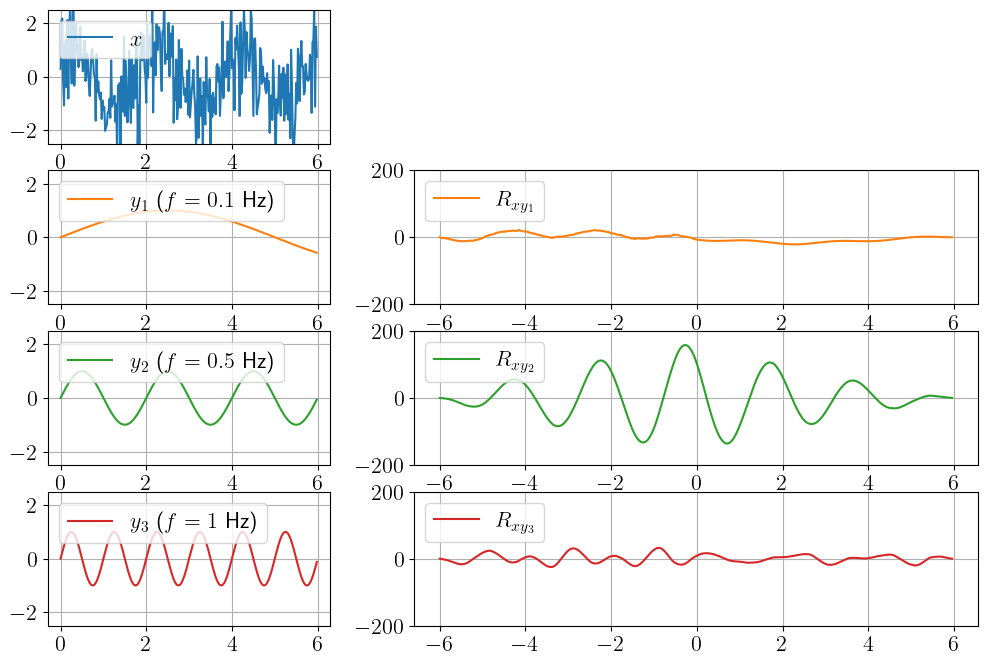

In [43]:
# Fréquences
freqs = [.1, .5, 1]

# Temps
N = 300
Te = 1/50
t = np.arange(0,N) * Te
u = np.arange(-N,N-1) * Te

# Signal bruité
x = np.sin(2*np.pi*freqs[1]*t + 1)
b = np.random.normal(0, 1, x.shape)
y = x + b


ylim = [-2.5, 2.5]
fig = plt.figure(figsize=(12,8), layout="constrained")
gs = GridSpec(4, 2, width_ratios=[1, 2], height_ratios=[1, 1, 1, 1])

# Signal x
ax = fig.add_subplot(gs[0])
ax.plot(t, y, label='$x$', color='C0')
ax.set_ylim(ylim)

# Autres signaux
for i in range(3):
    
    f = freqs[i]
    
    # Signal y
    w = np.sin(2*np.pi*f*t)
    ax = fig.add_subplot(gs[2*i+2])
    ax.plot(t, w, label=f'$y_{i+1}$ ($f={f}$ Hz)', color=f'C{i+1}')
    ax.set_ylim(ylim)
    
    # Intercorrélation
    z = np.correlate(y, w, mode="full")
    ax = fig.add_subplot(gs[2*i+3])
    ax.plot(u,z, label=f'$R_{{xy_{i+1}}}$', color=f'C{i+1}')
    ax.set_ylim([-200, 200])
    
for ax in fig.get_axes():
    ax.legend(loc='upper left')

plt.savefig("sinusoide.svg", bbox_inches='tight')

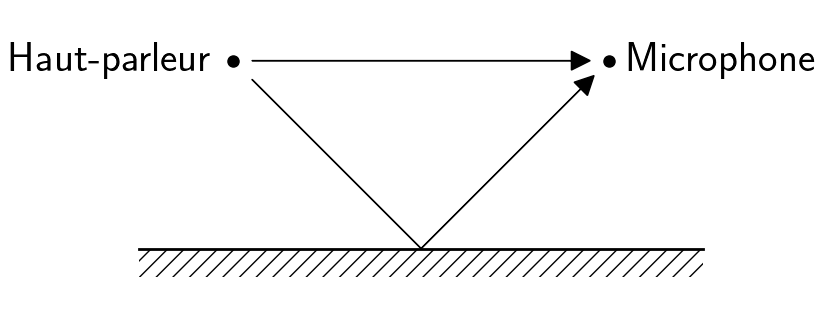

In [106]:
import matplotlib.patches as patches

# Création de la figure
fig, ax = plt.subplots(figsize=(8, 4))

# Limites et style
ax.set_xlim(2.2, 5.8)
ax.set_ylim(0.35, 1.6)
ax.axis('off')
ax.axis('equal')

# Haut-parleur et microphone (points)
ax.plot(3, 1.5, 'ko', markersize=8)
ax.plot(5, 1.5, 'ko', markersize=8)
ax.annotate("Haut-parleur", xy=(3, 1.5), xytext=(2.9, 1.5), ha='right', va='center', size=30)
ax.annotate("Microphone", xy=(5, 1.5), xytext=(5.1, 1.5), ha='left', va='center', size=30)

# Mur (ligne + motif hachuré)
ax.plot([2.5, 5.5], [0.5, 0.5], 'k-', lw=2)
ax.add_patch(patches.Rectangle((2.5, 0.35), 3, 0.15, fill=False, hatch='//', linewidth=0))

# Ondes (flèches)
ax.arrow(3.1, 1.5, 1.7, 0, head_width=0.1, head_length=0.1, fc='k', ec='k')
ax.arrow(3.1, 1.4, .9, -.9, head_width=0, head_length=0, fc='k', ec='k')
ax.arrow(4, 0.5, 0.85, 0.85, head_width=0.1, head_length=0.1, fc='k', ec='k')

plt.savefig("echo.svg", bbox_inches='tight')
plt.show()


## Estimation d'un écho

On commence par définir les conditions expérimentales.

In [5]:
# Atténuation
a = 0.5

# Retard (en secondes)
d = 0.3

 Signal émis (bruit blanc) :

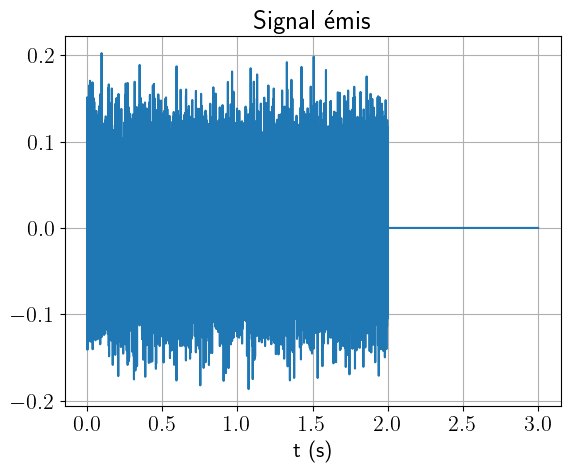

In [6]:
# Fréquence et période d'échantillonnage
fe = 22e3
Te = 1/fe

# Nombre de points
N = int(fe)

# Son (avec une seconde de silence ensuite)
s = np.random.randn(2*N) * .05
s = np.concatenate([s, np.zeros(N)])

N = len(s)
n = np.arange(N)
t = (n-1)*Te

# Affichage
plt.figure()
plt.plot(t,s)
plt.xlabel('t (s)')
plt.title('Signal émis')
plt.show()

# Ecoute
Audio(s, rate=fe)

Signal reçu

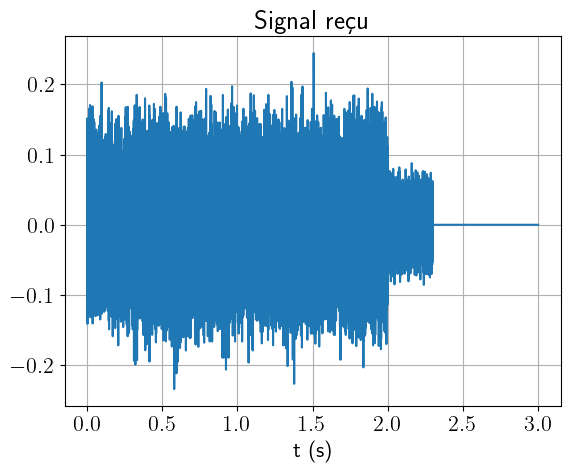

In [7]:
# Retard (en échantillons)
D = int(d/Te)

# Signal réfléchi (seul)
reflected = np.concatenate([np.zeros(D), s])
reflected = a * reflected[:N]

# Signal reçu (direct + réfléchi)
x = s + reflected

# Affichage
plt.figure()
plt.plot(t,x)
plt.xlabel('t (s)')
plt.title('Signal reçu')
plt.show()

# Ecoute
Audio(x, rate=fe)

Autocorrélation

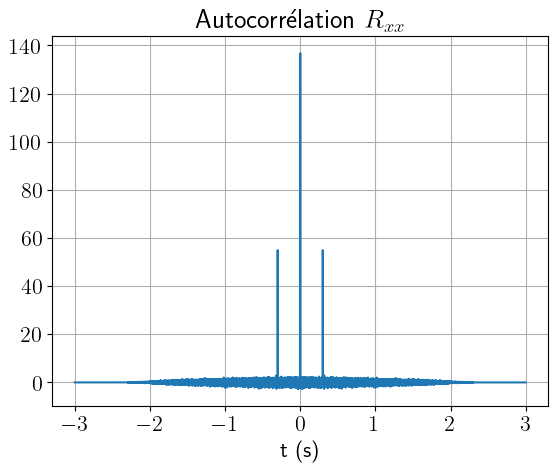

In [8]:
# Autocorrélation
c = np.correlate(x, x, mode="full")
n = np.arange(-N,N-1)

# Affichage
plt.figure()
plt.plot(n*Te,c)
plt.xlabel('t (s)')
plt.title('Autocorrélation $R_{xx}$')
plt.show()

On peut maintenant chercher les pics, et déterminer à partir ce ceux-ci les paramètres de l'écho

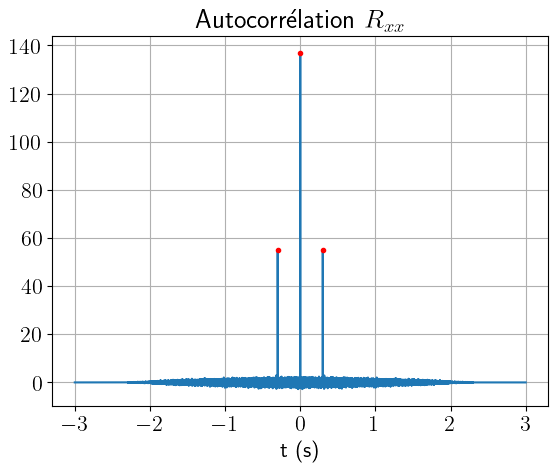

Premier maximum en -0.00 s égal à 136.83
Second maximum en  0.30 s égal à 54.98
Donc d = 0.30 s et a = 0.50


In [9]:
# Recherche des pics
from scipy.signal import find_peaks
peaks, props = find_peaks(c, distance=4000, height=10)

# Affichage des pics sur l'autocorrélation
plt.figure()
plt.plot(n*Te,c)
plt.xlabel('t (s)')
plt.title('Autocorrélation $R_{xx}$')
plt.plot(n[peaks]*Te, c[peaks], 'r.');
plt.show()

# Décalages des pics
t_direct = n[peaks[1]]*Te
t_reflected = n[peaks[2]]*Te

# Amplitude des pics
h_direct = c[peaks[1]]
h_reflected = c[peaks[2]]

# Paramètres
delta = h_direct**2 - 4*h_reflected**2
aest = (h_direct-np.sqrt(delta)) / (2*h_reflected)

# Affichage
print(f'Premier maximum en {t_direct:.2f} s égal à {h_direct:.2f}')
print(f'Second maximum en  {t_reflected:.2f} s égal à {h_reflected:.2f}')
print(f'Donc d = {t_reflected:.2f} s et a = {aest:.2f}')